## Napětí v bodě

#### Př. 2

Napjatost v bodě $A$ je dána složkami tenzoru napětí $\sigma_{x}=30\text{ }\mathrm{MPa}$, $\sigma_{y}=10\,\mathrm{MPa}$, 
$\sigma_{z}=20\,\mathrm{MPa}$, $\tau_{xy}=10\,\mathrm{MPa}$, $\tau_{xz}=20\,\mathrm{MPa}$, $\tau_{yz}=20\,\mathrm{MPa}$. Určete *hlavní napětí*, *hlavní směry* a *typ napjatosti*.

#### Řešení

Nutné knihovny a spuštění parádního tisku

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

*Python*ovský zápis zadaných hodnot složek tenzotu napětí $\boldsymbol{T}_\sigma\left( A\right)$,

In [2]:
sx,sy,sz,txy,txz,tyz=30,10,20,10,20,20

Výpočet hlavních vektorů pomocí nástrojů lineární algebry knihovny *Numpy*,

nejdříve se zavede tenzor $\boldsymbol{T}_\sigma\left(A\right)$ jako *Numpy*-pole,

In [3]:
T=np.array([[sx,txy,txz],[txy,sy,tyz],[txz,tyz,sz]])
T

array([[30, 10, 20],
       [10, 10, 20],
       [20, 20, 20]])

Hlavni napětí a odpovídající hlavní směry jako vlastní vektory se jednoduše naleznou pomocí jediného příkazu *linalg.eig* knihovny numpy.

*Úkol*: Najděte vlastní napětí a vlastní směry pomocí charakteristické rovnice napětí a vztahů pro vlastní směry tak, jak jsou uvedeny ve skriptech *Pružnosti a pevnosti II* a srovnejte s níže uvedenými výsledky.

In [4]:
sigma,n=np.linalg.eig(T)
print 'hlavni napeti a odpovidajici hlavni smery:'
for ii in range(3):
  print 'sigma{:1d}={:9.5E}'.format(ii+1,sigma[ii])
  print '       [{:9.5E}]'.format(n[0,ii])
  print '    n{:1d}=[{:9.5E}]'.format(ii+1,n[1,ii])
  print '       [{:9.5E}]'.format(n[2,ii])

hlavni napeti a odpovidajici hlavni smery:
sigma1=5.50466E+01
       [6.62600E-01]
    n1=[4.21859E-01]
       [6.18866E-01]
sigma2=1.13536E+01
       [7.28518E-01]
    n2=[-5.54808E-01]
       [-4.01808E-01]
sigma3=-6.40023E+00
       [-1.73846E-01]
    n3=[-7.17093E-01]
       [6.74948E-01]


#### Vykreslení *kvadriky napětí* v bodě

Protože žádné z hlavních napětí není nulové jde o prostorovou kvadriku a vzhledem k tomu, že hlavní napětí $\sigma_1\neq\sigma_2$ a $\sigma_3<0$ je tato kvadrika eliptický hyperboloid s hlavní osou ve směru $x_3$,

$$
 \sigma_1 x_1^2+\sigma_2 x_2^2-\left|\sigma_3\right| x_3^2=\pm1,
$$

kde $+1$ a $-1$ na pravé straně rovnice odpovídá jednodílnému a dvoudílnému hyperboloidu.

Parametricky se jednodílný hyperboloid dá v hlavním souřadnicovém systému $x_1x_2x_3$ popsat rovnicemi,

\begin{eqnarray}
 x_1&=&\frac{1}{\sqrt{\sigma_1}}\cosh(\varphi)\cos(\psi), \\
 x_2&=&\frac{1}{\sqrt{\sigma_2}}\cosh(\varphi)\sin(\psi), \\
 x_3&=&\frac{1}{\sqrt{\sigma_3}}\sinh(\varphi).
\end{eqnarray}

V *Python*u se tyto rovnice mohou zapsat následovně,

In [5]:
def hyperboloid1(u,v,coefs):
  rx,ry,rz=1/np.sqrt(coefs)
  x=rx*np.cosh(u)*np.cos(v)
  y=ry*np.cosh(u)*np.sin(v)
  z=rz*np.sinh(u)
  return np.array([x,y,z])

Dvojdílný hyperboloid se v hlavním souřadnicovém systému $x_1x_2x_3$ popíše rovnicemi,

\begin{eqnarray}
 x_1&=&\frac{1}{\sqrt{\sigma_1}}\sinh(\varphi)\cos(\psi), \\
 x_2&=&\frac{1}{\sqrt{\sigma_2}}\sinh(\varphi)\sin(\psi), \\
 x_3&=&\pm\frac{1}{\sqrt{\sigma_3}}\cosh(\varphi).
\end{eqnarray}

V *Python*u se tyto rovnice mohou zapsat následovně,

In [6]:
def hyperboloid2a(u,v,coefs):
  rx,ry,rz=1/np.sqrt(coefs)
  x=rx*np.sinh(u)*np.cos(v)
  y=ry*np.sinh(u)*np.sin(v)
  z=rz*np.cosh(u)
  return np.array([x,y,z])
def hyperboloid2b(u,v,coefs):
  rx,ry,rz=1/np.sqrt(coefs)
  x=rx*np.sinh(u)*np.cos(v)
  y=ry*np.sinh(u)*np.sin(v)
  z=-rz*np.cosh(u)
  return np.array([x,y,z])

Podobně jako v *Př1*, natočení hyperboloidu v původním souřadnicovém systému na základě vztahů,

$$
\left[
  \begin{array}{c}
   x\\y\\z
  \end{array}
 \right]=
 \left[
  \begin{array}{ccc}
   \boldsymbol{n}_1&\boldsymbol{n}_2&\boldsymbol{n}_3
  \end{array}
 \right]\left[
  \begin{array}{c}
   x_1\\x_2\\x_3
  \end{array}
 \right]=\left[
  \begin{array}{ccc}
   \cos\alpha_1&\cos\alpha_2&\cos\alpha_3\\
   \cos\beta_1&\cos\beta_2&\cos\beta_3\\
   \cos\gamma_1&\cos\gamma_2&\cos\gamma_3\\
  \end{array}
 \right]\left[
  \begin{array}{c}
   x_1\\x_2\\x_3
  \end{array}\right],
$$

kde $\alpha_i$, $\beta_i$ a $\gamma_i$ jsou úhly, jež svírají hlavní směry kvadriky napětí se souřadnicovými osami $x$, $y$ a $z$, provedeme pomocí *dekorátoru*,

In [7]:
def natoceni(krivka,n):
  mC=np.array([[float(n[0][0]),float(n[1][0]),float(n[2][0])], \
               [float(n[0][1]),float(n[1][1]),float(n[2][1])], \
               [float(n[0][2]),float(n[1][2]),float(n[2][2])]])
  def inner(u,v,coefs):
    x0,y0,z0=krivka(u,v,coefs)
    i,j=x0.shape[0],x0.shape[1]
    x,y,z=np.zeros((i,j)),np.zeros((i,j)),np.zeros((i,j))
    for ii in range(i):
      for jj in range(j):
        a=np.array([x0[ii,jj],y0[ii,jj],z0[ii,jj]])
        b=np.dot(mC,a)
        x[ii,jj]=b[0]
        y[ii,jj]=b[1]
        z[ii,jj]=b[2]
    return x,y,z
  return inner

Vykreslení kvadriky napětí v hlavním souřadnicovém systému,

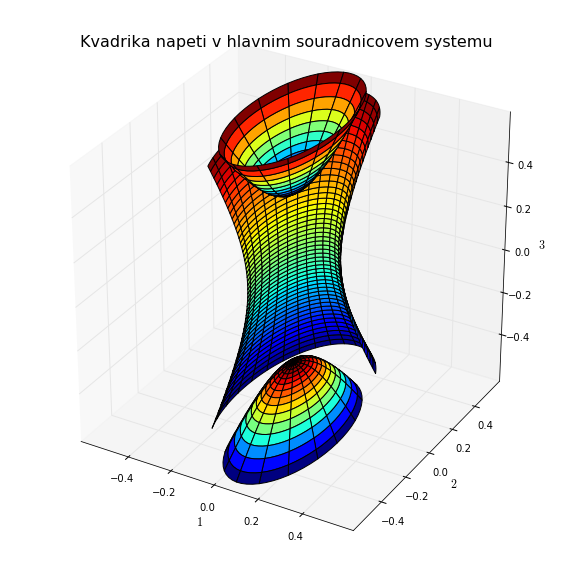

In [8]:
#parametrizace hyperboloidu
u=np.linspace(-1.2,1.2,200)
v=np.linspace(np.pi/4,1.2*np.pi,60)
[u1,v1]=np.meshgrid(u,v)
u=np.linspace(0.,1.2,60)
v=np.linspace(0,2*np.pi,60)
[u2,v2]=np.meshgrid(u,v)
#parametry hyperboloidu
coefs=(sigma[0],sigma[1],abs(sigma[2]))
#vykresleni kvadriky v hlavnim souradnicovem systemu  
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, projection='3d')
ax.set_xlim(-0.6,0.6)
ax.set_ylim(-0.6,0.6)
ax.set_zlim(-0.6,0.6)
ax.set_title('Kvadrika napeti v hlavnim souradnicovem systemu').set_fontsize(16)
ax.set_xlabel(r'$1$').set_fontsize(12)
ax.set_ylabel(r'$2$').set_fontsize(12)
ax.set_zlabel(r'$3$').set_fontsize(12)
x,y,z=hyperboloid1(u1,v1,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)
x,y,z=hyperboloid2a(u2,v2,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)
x,y,z=hyperboloid2b(u2,v2,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)

Vykreslení kvadriky napětí v původním souřadnicovém systému $xyz$,

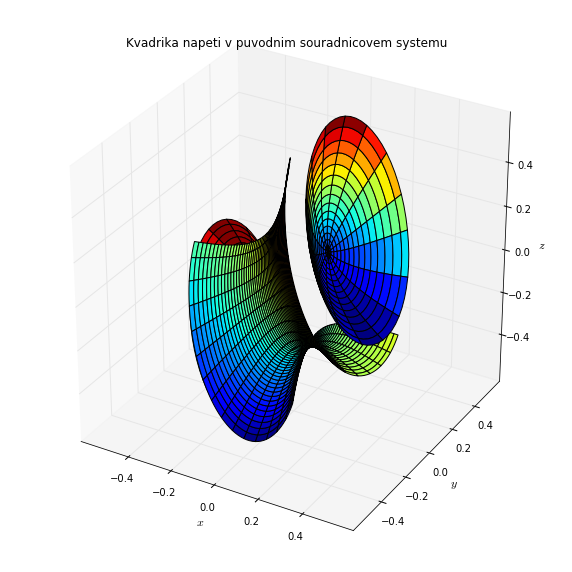

In [9]:
#ykresleni kvadriky v hlavni v puvodnim souradnicovem systemu
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
hyperboloid1=natoceni(hyperboloid1,n)
hyperboloid2a=natoceni(hyperboloid2a,n)
hyperboloid2b=natoceni(hyperboloid2b,n)
ax.set_xlim(-0.6,0.6)
ax.set_ylim(-0.6,0.6)
ax.set_zlim(-0.6,0.6)
ax.set_title('Kvadrika napeti v puvodnim souradnicovem systemu')
ax.set_xlabel(r'$x$').set_fontsize(12)
ax.set_ylabel(r'$y$').set_fontsize(12)
ax.set_zlabel(r'$z$').set_fontsize(12)
x,y,z=hyperboloid1(u1,v1,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)
x,y,z=hyperboloid2a(u2,v2,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)
x,y,z=hyperboloid2b(u2,v2,coefs)
ax.plot_surface(x,y,z,rstride=4,cstride=4,cmap=cm.jet)
plt.show()